import 'Simgen' class from 'simgen' module of 'recan' package : 

In [1]:
from recan.simgen import Simgen

creating 'Simgen' object. To initialize the object pass your alignment in 'fasta' format as an argument. 

The input data are taken from the article: 
"Hepatitis B Virus of Genotype B with or without Recombination with Genotype C over the Precore Region plus the Core Gene". Fuminaka Sugauchi et al. JOURNAL OF VIROLOGY, June 2002, p. 5985–5992. 10.1128/JVI.76.12.5985-5992.2002 https://jvi.asm.org/content/76/12/5985 



In [2]:
sim = Simgen("./data/hbv_C_Bj_Ba.fasta")

the object of the Simgen class has method 'get_info()' which returns information about the alignment

In [3]:
sim.get_info()

index:	sequence id:
0	AB048704.1_genotype_C_
1	AB033555.1_Ba
2	AB010291.1_Bj
alignment length:  3215


So, we have three sequences in our alignment. Simgen class is based on the MultipleSequenceAlignment class of the Biopython library. 

We can treat our alignment as the array with n_samples and n_features dimensions, where 'samples' are sequences themselves, and the features are columns of nucleotides in the alignment. So, index corresponds to the sequence and gives us access to it, indices start with 0.

after you've created the object you can draw the similarity plot. 

call the method 'simgen' of the Simgen object to draw the plot. Pass the following parameters to the method:

- 'window': sliding window size. The number of nucleotides the sliding window will span. It has the value of 500 by default.
- 'shift': this is the step our window slides downstream the alignment. It's value is set to 250 by default
- 'pot_rec': the index of the potential recombinant: use method 'get_info()' to get the indices, especially if your alignment has many sequences. All the other sequences will be plotted as function of distance to that sequence.


The article names the isolate of Ba genotype the recombinant between the virus of C genotype and genotype Bj. Let's plot it. We set genotype Ba as the potential recombinant : 



In [4]:
sim.simgen(window=200, shift=50, pot_rec=1)

potential recombinant is not shown in the plot, as the distances are calculated relative to it The higher is the distance function (i.e. the closer to 1), the closer is the sequence to the recombinant and vice versa. 

we can see typical 'crossover' of the distances which is the indicator of the possible recombination event. The distance of one isolate 'drops down' whereas the distance of the other remains the same of even gets closer to the potential recombinant, this abrupt drop shows that recombination could take place.

the picture from the article is shown below. It's just turned upside down relative to our plot, and instead of distance drop we see distance rising. Here goes away from the genotype C, whereas Ba keeps the same distance

![title](./data/hbv_C_Bj_Ba.jpg)

By default 'simgen' method plots the whole alignment. But after initial exploration, we can take a closer look at a particular region by passing the 'region' parameter to the simgen method. We can slice the alignment by using this parameter. 'region' must be a tuple or a list with two integers: the start and the end position of the alignment slice.
```
region = (start, end)
```

In [5]:
sim.simgen(window=200, shift=50, pot_rec=1, region=(1000, 2700))

to customize the plot or export the data, use 'get_df()' method. 'get_df' returns pandas DataFrame object with sequences as samples, and distances as features.

In [6]:
sim.get_data()

,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,...,2250,2300,2350,2400,2450,2500,2550,2600,2650,2700
AB048704.1_genotype_C_,0.86,0.895,0.920,0.905,0.895,0.900,0.88,0.895,0.925,0.905,...,0.96,0.95,0.975,0.920,0.855,0.840,0.81,0.826667,0.87,0.84
AB010291.1_Bj,0.90,0.935,0.955,0.955,0.950,0.955,0.94,0.965,0.980,0.970,...,0.98,0.97,0.980,0.935,0.915,0.905,0.89,0.913333,0.91,0.90


In [7]:
df = sim.get_data()

after explorting data to DataFrame we can easily customize the plot :

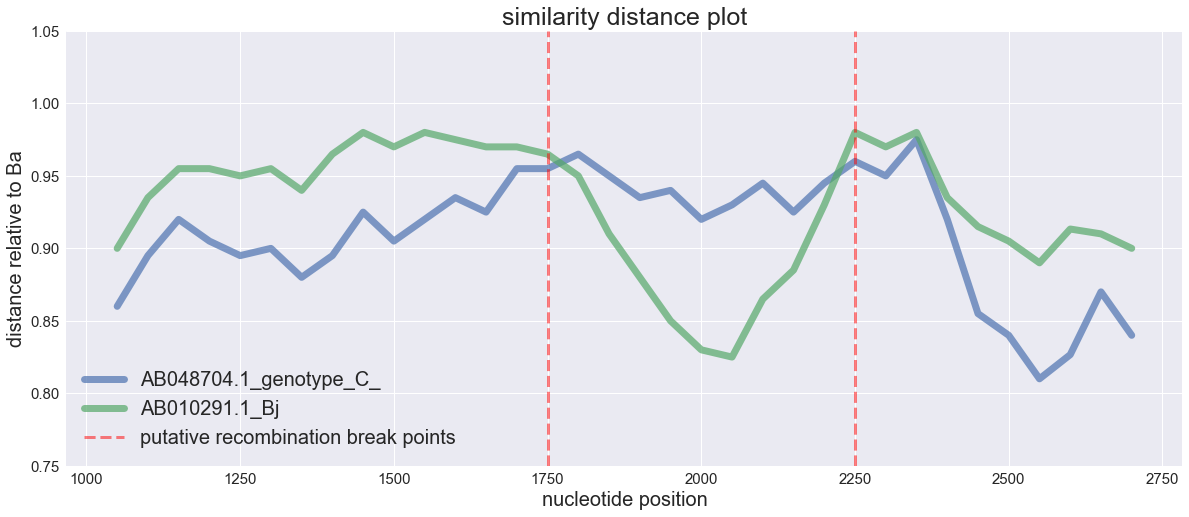

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig_dist1 = plt.figure(figsize=(20, 8))
plt.plot(df.loc["AB048704.1_genotype_C_", : ], lw=7, alpha=0.7, label="AB048704.1_genotype_C_")
plt.plot(df.loc["AB010291.1_Bj", : ], lw=7, alpha=0.7, label="AB010291.1_Bj")

plt.ylim(0.75, 1.05)
plt.title("similarity distance plot", fontsize=25)
plt.ylabel("distance relative to Ba", fontsize=20)
plt.xlabel("nucleotide position", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)

plt.axvline(1750, alpha=0.5, color="red", lw=3,
            linestyle="dashed", label="putative recombination break points")
plt.axvline(2250, alpha=0.5, color="red", lw=3,
            linestyle="dashed"  )

plt.legend(prop={"size":20})
plt.show()


pandas DataFrame object is easy to manipulate. To export and store the data use pandas methods to_excel() or to_csc()

In [12]:
df.to_csv("hbv_distance.csv")

if settind optional parameter 'df' of the method 'get_df' to False, method returns the dictionary, where keys are sequences names, and lists under the keys are distance data

In [14]:
print(sim.get_data(df=False))

{'AB048704.1_genotype_C_': [0.86, 0.895, 0.92, 0.905, 0.895, 0.9, 0.88, 0.895, 0.925, 0.905, 0.92, 0.935, 0.925, 0.955, 0.955, 0.965, 0.95, 0.935, 0.94, 0.92, 0.9299999999999999, 0.945, 0.925, 0.945, 0.96, 0.95, 0.975, 0.92, 0.855, 0.84, 0.81, 0.8266666666666667, 0.87, 0.84], 'AB010291.1_Bj': [0.9, 0.935, 0.955, 0.955, 0.95, 0.955, 0.94, 0.965, 0.98, 0.97, 0.98, 0.975, 0.97, 0.97, 0.965, 0.95, 0.91, 0.88, 0.85, 0.83, 0.825, 0.865, 0.885, 0.9299999999999999, 0.98, 0.97, 0.98, 0.935, 0.915, 0.905, 0.89, 0.9133333333333333, 0.91, 0.9]}


'simgen()' method has optional parameter 'dist' which denoted method used to calculate pairwise distance. By default 'dist='pdistance' and calculates simple pairwise distance. To use Kimura 2 parameter distance pass set 'dist='k2p''

In [16]:
sim.simgen(window=200, shift=50, pot_rec=1, region=(1000, 2700), dist='k2p')

Let's try another example, these are too hepatitis B virus sequences.

In [15]:
sim1 = Simgen("./data/conss_and_recs_short.fasta")


In [ ]:
sim1.get_info()

we choose the recombinant under index 8

In [ ]:
sim1.simgen(window=250, shift=50, pot_rec=8)

In [ ]:
sim2 = Simgen()